# Project 1: Testing a perceptual phenomenon
## The stroop test


### Q1: What is our independent variable? What is our dependent variable?
#### Our independent variable is whether or not the color of the words match the meaning of the word.
#### Our dependent variable is the time it takes a certain user to complete the test.


### Q2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

#### In this problem, we have a sample of individuals who have taken two different tests, and we're wondering whether there's a significant difference in how they performed on each of them, and specificially whether individuals are slower on the incongruent test.
#### Simply comparing the means of the two samples would leave out important information; as we'll see later there's a clear trend in the difference between results on the two tests for each individual. This fits the characteristics of a dependent one-tailed t-test for paired samples, and we're going to look at the mean of the differences in the sample test results, $\mu_D$. The difference will be calculated as $D = x_I-x_C$, that is the test time on the incongruent test versus the test time on the congruent test. Thus, a positive difference indicates that the incongruent test took more time for the sample individuals. 

#### Null hypothesis: There is no difference between the time individuals in the population take doing the congruent and the incongruent test, or they spend less time doing the congruent test.

#### Alternative hypothesis: Individuals in the population spend longer time doing the incongruen then the congruent test

$$
H_0:\mu_D \le 0\\
H_A:\mu_D > 0
$$

#### The corresponding t-value will be defined as 
$$
t = \frac{\bar{X_D}-\mu_0}{S_D/\sqrt{n}}
$$
#### Where $\bar{X_D}$ is the mean of the sample differences, and $S_D/\sqrt{n}$ the sample standard error. $\mu_0$ is 0 as we're looking to compare whether the results on the tests are the same, not whether one has a certain offset from the other test.

#### To reject the null hypothesis, we look up the one sided t-value for significance $p<0.05$ and sample size 24 (23 degrees of freedom) and find $t>1.714$. 

###Q3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
# Causes plots to display within the notebook rather than in a new window
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
path = 'C:\Users\hakon.tromborg\Data Analyst Nanodegree\Data\stroopdata.csv'
data = pd.read_csv(path)
means = data.mean()
std = data.std(0)
stderr = data.std(0)/data.shape[1]
print "The sample size is:"
print data.shape
print "The means of the two distrbutions are: "
print means
print "The corrected sample standard deviations of the two distributions are: "
print std
print "The standard errors of the two distributions are: "
print stderr

The sample size is:
(24, 2)
The means of the two distrbutions are: 
Congruent      14.051125
Incongruent    22.015917
dtype: float64
The corrected sample standard deviations of the two distributions are: 
Congruent      3.559358
Incongruent    4.797057
dtype: float64
The standard errors of the two distributions are: 
Congruent      1.779679
Incongruent    2.398529
dtype: float64


### Q4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

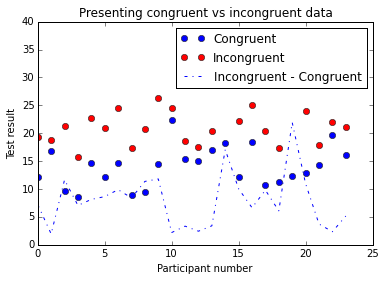

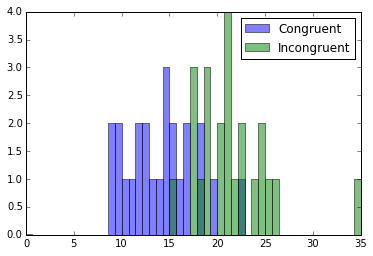

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

fig = plt.figure


plt.plot(data['Congruent'],'bo',label="Congruent")
plt.plot(data['Incongruent'],'ro',label="Incongruent")
plt.plot(data['Incongruent']-data['Congruent'],'-.', label="Incongruent - Congruent")
plt.legend(loc='upper right')

plt.xlabel('Participant number')
plt.ylabel('Test result')

plt.title('Presenting congruent vs incongruent data')

plt.show()

bins = np.linspace(0,35,50)
plt.hist(data['Congruent'],bins,alpha=0.5,label='Congruent')
plt.hist(data['Incongruent'],bins,alpha=0.5,label='Incongruent')
plt.legend(loc='upper right')
plt.show()

#### From the first plot, we see that the result is better when shown the congruent test, for all subjects.
#### The histogram at the bottom also demonstrates that in general, the test result is better (faster) when the text and color are congruent.
#### Note: I would love some feedback on some better graphs to visualize the difference here

###Q5: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

#### First, we create the set of differences, $X_D$, and find the mean $\bar{X_D}$. Then we find the Standard error $S_D$.

In [5]:
X_D = (data['Incongruent']-data['Congruent'])
X_Dmean = X_D.mean(axis=0)
S_D = X_D.std()
mu_0 = 0
df = 23
print "The mean difference between the test scores for the Incongruent and Congruent test is:" 
print X_Dmean
s_C = data['Congruent'].std(axis=0)
s_I = data['Incongruent'].std(axis=0)
denominator = S_D/np.sqrt(24)
print "The denominator of the t-equation is:"
print denominator

t = (X_Dmean-mu_0)/denominator
print "And finally our t-value is: "
print t

The mean difference between the test scores for the Incongruent and Congruent test is:
7.96479166667
The denominator of the t-equation is:
0.993028634778
And finally our t-value is: 
8.02070694411


#### The t-value 8.02 is way outside what we stated as $p<0.05$, and so $H_0$ is rejected.

#### In conclusion, it seems that individuals take more timeidentifying the color of a word when the letters spell a different color.
#### It's also likely, given that all of the 24 individuals spent more time identifying the incongruent words than the congruent words.
#### Being familiar with the concept from before, this was as I expected.